![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

### TÍTULO

### ¿Somos libres de elegir lo que escuchamos? 

Como Spotify y sus principales playlist editoriales afectan al consumo musical y las listas de éxitos.


### TEMA

Según un estudio realizado por la Federación Internacional de la Industria Fonográfica (IFPI) en 2022, del consumo musical total en España, el 34% fue en straming, ya sea por suscripción o con modelo freemium con anuncios. Si nos fijamos en la radio y la música comprada, representarían solo el 14% y 10% respectivamente. Si hablamos a nivel global, el 24% y 8% lo hacen por streaming de suscripción y freemium, y el 17% y 10% corresponderían a radio y ventas.

En este estudio trataremos de ver la influencia de Spotify, plataforma de streaming por excelencia, en las listas de ventas españolas. ¿Por qué rara vez vemos artistas independientes copar las listas de éxitos? ¿Qué influencia tienen los sellos multinacionales en el algoritmo de Spotify y sus playlist internacionales?

### HIPÓTESIS

Define aquí lo que será la hipótesis de tu proyecto.
Deberás tener más de una, pero tu proyecto lo harás teniendo una principal hipótesis.

La hipótesis principal del proyecto es que la música que escuchamos está influenciada, en gran medida por lo que el algoritmo de Spotify y sus playlist editoriales (influenciadas por grupos multinacionales como Sony, Universal o Warner con participación accionarial en la empresa). Para ver hasta donde llega esta influencia, compararemos la principal lista de ventas española (Promusicae) e internacional(Billboard Global), con sus homónimas en Spotify, así como las principales playlist editoriales. 

Tratando así de ver, por un lado, la influencia del streaming en las ventas totales, y la de las propias plataformas en la elección del consumo. 

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Incluye aquí una vista del dataset o datasets de los que partirás para poder evaluar tu hipótesis. <br>
También incluye el origen de estos datos y su fuente.

Link playlist editoriales: https://developer.spotify.com/

Ventas España: Promusicae (https://www.elportaldemusica.es/lists/top-100-canciones/2023/19)

Ventas Global: Billboard Global 200 (https://www.billboard.com/charts/billboard-global-200/#)

Muestra mediante un head() los principales datasets con los que vas a trabajar

In [68]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df_esp = pd.read_csv('regional-es-weekly-2023-05-11.csv')

df_esp = df_esp.drop('uri', axis=1)

df_esp.rename(columns={'track_name': 'Track Name','source': 'Label'}, inplace=True)

df_esp


,rank,artist_names,Track Name,Label,peak_rank,previous_rank,weeks_on_chart,streams
0,1,Saiko,Supernova,2023 SAIKO,1,1,4,4946796
1,2,"Lola Indigo, Quevedo",EL TONTO,Universal Music Spain S.L.,1,2,4,4836705
2,3,"ROSALÍA, Rauw Alejandro",BESO,Columbia Records/Duars Entertainment/Sony Musi...,1,3,7,3799069
3,4,"Jhayco, Quevedo",Mami Chula,N&E Entertainment LLC,4,4,2,3728137
4,5,"Marshmello, Manuel Turizo",El Merengue,Sony Music Latin,4,5,10,3444822
...,...,...,...,...,...,...,...,...
195,196,"Sen Senra, Sky Rompiendo",Uno De Eses Gatos,Universal Music Spain S.L.,196,-1,1,388634
196,197,Anuel AA,¿Qué Nos Pasó?,"Real Hasta La Muerte, LLC",49,-1,40,387323
197,198,"Aitana, Emilia, Ptazeta",Quieres,Universal Music Spain S.L.,28,-1,41,387066
198,199,"Eladio Carrion, Bizarrap, Duki",Sin Frenos,Rimas Entertainment LLC,48,188,54,385140


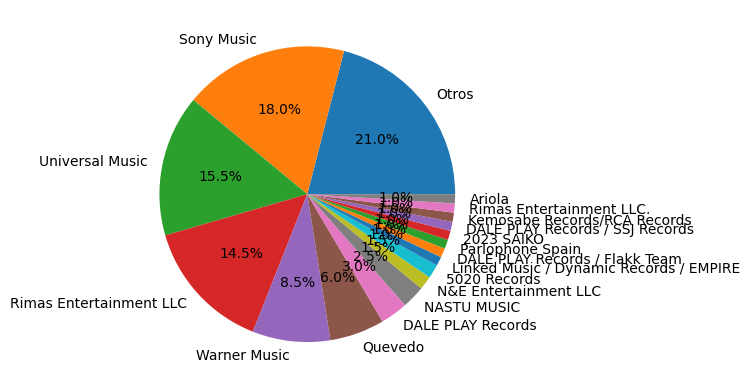

In [90]:
# Vamos a cambiar los nombres regionales de los sellos para poder agruparlos (por ejemplo: WM Spain, WM Mexico y WEA Latina = Warner Music)

df_esp ['Label'] = df_esp ['Label'].replace({'Sony Music Entertainment': 'Sony Music', 'Sony Music Latin': 'Sony Music', 'Columbia Records/Duars Entertainment/Sony Musi...': 'Sony Music', 'Sony Music Latin/DALE PLAY Records': 'Sony Music','Sony Music Argentina':'Sony Music','Sony Music Latin/Duars Entertainment':'Sony Music','Columbia':'Sony Music', 'Columbia Records/Duars Entertainment/Sony Music Latin': 'Sony Music'})
df_esp['Label'] = df_esp ['Label'].replace({'WM Spain' : 'Warner Music', 'WM Mexico': 'Warner Music', 'WEA Latina' : 'Warner Music'})
df_esp ['Label'] = df_esp ['Label'].replace({'UMLE - Latino' : 'Universal Music', 'Universal Music Spain S.L.' : 'Universal Music', 'Virgin Music Spain': 'Universal Music','Universal Music Argentina S.A.': 'Universal Music', 'Universal Music AB': 'Universal Music'})

frecuencias = df_esp ['Label'].value_counts()
valores_unicos = frecuencias[frecuencias == 1].index
df_esp.loc[df_esp['Label'].isin(valores_unicos), 'Label'] = 'Otros'

# Para que la representación gráfica del dataframe quede más limpia, 
# vamos a sustituir todos los valores que no están repetidos (todos ellos ellos y distribuidoras independientes) por el valor 'Otros'

porcentajes = df_esp['Label'].value_counts(normalize=True) * 100
valores = porcentajes.values
etiquetas = porcentajes.index
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.show()

In [46]:
df_int = pd.read_csv('regional-global-weekly-2023-05-11.csv')

df_int = df_int.drop('uri', axis=1)

df_int.rename(columns={'track_name': 'Track Name','source': 'Label'}, inplace=True)

df_int

,rank,artist_names,Track Name,Label,peak_rank,previous_rank,weeks_on_chart,streams
0,1,"Grupo Frontera, Bad Bunny",un x100to,Rimas Entertainment LLC.,1,1,4,49594770
1,2,"Eslabon Armado, Peso Pluma",Ella Baila Sola,DEL Records,1,2,8,48014265
2,3,"Yng Lvcas, Peso Pluma",La Bebe - Remix,WM Mexico,3,3,8,39586315
3,4,FIFTY FIFTY,Cupid - Twin Ver.,WM Korea,4,5,8,36319569
4,5,Miley Cyrus,Flowers,Columbia,1,4,17,33810864
...,...,...,...,...,...,...,...,...
195,196,Frank Ocean,Pink + White,Boys Don't Cry,151,189,4,7648322
196,197,"Eminem, Dina Rae",Superman,Aftermath,108,192,32,7645179
197,198,Taylor Swift,Shake It Off,"Big Machine Records, LLC",143,-1,2,7628964
198,199,Hozier,Take Me To Church,Universal-Island Records Ltd.,108,187,103,7623544


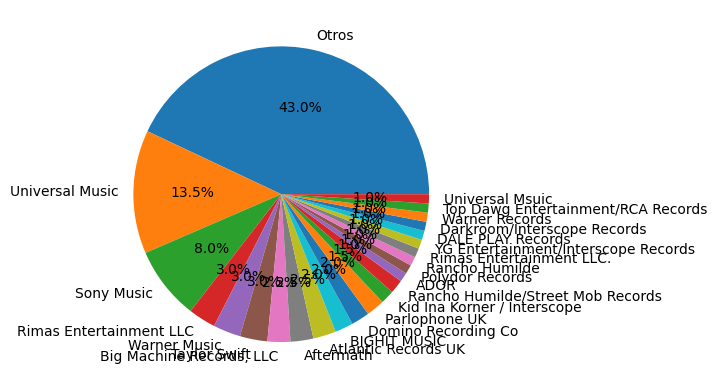

In [94]:
df_int ['Label'] = df_int ['Label'].replace({'Sony Music Entertainment': 'Sony Music', 'Sony Music Latin': 'Sony Music', 'Columbia Records/Duars Entertainment/Sony Musi...': 'Sony Music', 'Sony Music Latin/DALE PLAY Records': 'Sony Music','Sony Music Argentina':'Sony Music','Sony Music Latin/Duars Entertainment':'Sony Music','Columbia':'Sony Music', 'Columbia Records/Duars Entertainment/Sony Music Latin': 'Sony Music'})
df_int['Label'] = df_int ['Label'].replace({'WM Spain' : 'Warner Music', 'WM Mexico': 'Warner Music', 'WEA Latina' : 'Warner Music','WM Korea':'Warner Music'})
df_int ['Label'] = df_int ['Label'].replace({'UMLE - Latino' : 'Universal Music', 'Universal Music Spain S.L.' : 'Universal Music', 'Virgin Music Spain': 'Universal Music','Universal Music Argentina S.A.': 'Universal Music', 'Universal Music AB': 'Universal Music', 'Republic Records':'Universal Music','Universal Republic Records':'Universal Music','Universal-Island Records Ltd.':'Universal Msuic'})

frecuencias = df_int ['Label'].value_counts()
valores_unicos = frecuencias[frecuencias == 1].index
df_int.loc[df_int['Label'].isin(valores_unicos), 'Label'] = 'Otros'

porcentajes = df_int['Label'].value_counts(normalize=True) * 100
valores = porcentajes.values
etiquetas = porcentajes.index
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.show()

Continuamos visualizando las principales playlist editoriales nacionales: Éxitos España, Pop con Ñ y PEGAO.

Apunte: las playlist elegidas son las principales que incluyen temas actuales, no necesariamente las que más seguidores tienen. Muchas de las listas más seguidas como 'Míticas' o 'Los 2000 en España' cuentan con temas antiguos que no tienen relación con las listas de éxitos actuales y el estado de la industria musical.

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Configura las credenciales de la API de Spotify
client_id = '40855ddf3bd54d9d9c01b10b8bbf8fe8'
client_secret = 'd299e678564846c08fba7227c787e7c8'
redirect_uri = 'https://github.com/andrewgimeno/hundirlaflota'

# Autenticación
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Obtiene los datos de la lista de reproducción
playlist_id = '37i9dQZF1DXaxEKcoCdWHD'
results = sp.playlist(playlist_id)

# Procesa los datos
tracks = results['tracks']['items']
playlist_data = []
for track in tracks:
    album = track['track']['album']
    track_data = {
        'Track Name': track['track']['name'],
        'Artist': track['track']['artists'][0]['name'],
        'Album': album['name'],
        'Release Date': album['release_date'],
        'Label': ''
    }

# Obtener información adicional del sello discográfico
    album_details = sp.album(album['id'])
    if 'label' in album_details:
        track_data['Label'] = album_details['label']
    playlist_data.append(track_data)

# Crea un DataFrame
df = pd.DataFrame(playlist_data)

# Exporta el DataFrame a un archivo CSV
df.to_csv('exitos_españa.csv', index=False)


In [82]:
df_exitos_esp = pd.read_csv('exitos_españa.csv')

df_exitos_esp

,Track Name,Artist,Album,Release Date,Label
0,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
1,Clavaito,Chanel,Clavaito,2023-04-27,Sony Music Entertainment
2,Supernova,Saiko,Supernova,2023-04-19,2023 SAIKO
3,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin
4,EL TONTO,Lola Indigo,EL DRAGÓN,2023-04-13,Universal Music Spain S.L.
5,Arena y Sal,Omar Montes,Arena y Sal,2023-05-18,Sony Music Latin
6,Todo Contigo,Álvaro De Luna,Todo Contigo,2023-03-17,WM Spain
7,Nochentera,Vicco,Nochentera,2022-12-19,Sony Music Entertainment
8,VAGABUNDO,Sebastian Yatra,VAGABUNDO,2023-05-12,UMLE - Latino
9,Que te vaya bien,Rvfv,Que te vaya bien,2023-04-21,NASTU MUSIC


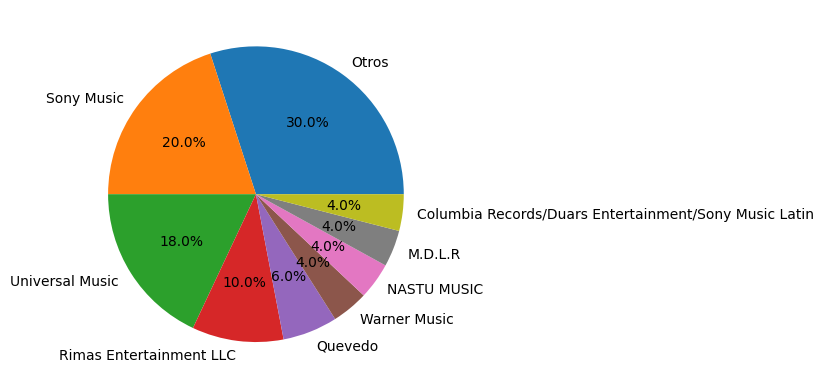

In [87]:
df_exitos_esp ['Label'] = df_exitos_esp ['Label'].replace({'Sony Music Entertainment': 'Sony Music', 'Sony Music Latin': 'Sony Music', 'Columbia Records/Duars Entertainment/Sony Musi...': 'Sony Music', 'Sony Music Latin/DALE PLAY Records': 'Sony Music','Sony Music Argentina':'Sony Music'})
df_exitos_esp['Label'] = df_exitos_esp ['Label'].replace({'WM Spain' : 'Warner Music', 'WM Mexico': 'Warner Music', 'WEA Latina' : 'Warner Music'})
df_exitos_esp ['Label'] = df_exitos_esp ['Label'].replace({'UMLE - Latino' : 'Universal Music', 'Universal Music Spain S.L.' : 'Universal Music', 'Virgin Music Spain': 'Universal Music','Universal Music Argentina S.A.': 'Universal Music', 'Universal Music AB': 'Universal Music'})

frecuencias = df_exitos_esp ['Label'].value_counts()
valores_unicos = frecuencias[frecuencias == 1].index
df_exitos_esp.loc[df_exitos_esp['Label'].isin(valores_unicos), 'Label'] = 'Otros'

porcentajes = df_exitos_esp['Label'].value_counts(normalize=True) * 100
valores = porcentajes.values
etiquetas = porcentajes.index
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.show()

In [13]:
# Obtiene los datos de la lista de reproducción
playlist_id = '37i9dQZF1DX3sCT1ItXgNd'
results = sp.playlist(playlist_id)

# Procesa los datos
tracks = results['tracks']['items']
playlist_data = []
for track in tracks:
    album = track['track']['album']
    track_data = {
        'Track Name': track['track']['name'],
        'Artist': track['track']['artists'][0]['name'],
        'Album': album['name'],
        'Release Date': album['release_date'],
        'Label': ''
    }

# Obtener información adicional del sello discográfico
    album_details = sp.album(album['id'])
    if 'label' in album_details:
        track_data['Label'] = album_details['label']
    playlist_data.append(track_data)

# Crea un DataFrame
df = pd.DataFrame(playlist_data)

# Exporta el DataFrame a un archivo CSV
df.to_csv('pop_con_ñ.csv', index=False)

In [14]:
df_pop_con_ñ = pd.read_csv('pop_con_ñ.csv')

df_pop_con_ñ.head(10)

,Track Name,Artist,Album,Release Date,Label
0,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin
1,VAGABUNDO,Sebastian Yatra,VAGABUNDO,2023-05-12,UMLE - Latino
2,Clavaito,Chanel,Clavaito,2023-04-27,Sony Music Entertainment
3,Algo Sencillito,Marta Santos,Algo Sencillito,2023-05-18,Virgin Music Spain
4,Todo Contigo,Álvaro De Luna,Todo Contigo,2023-03-17,WM Spain
5,EL TONTO,Lola Indigo,EL DRAGÓN,2023-04-13,Universal Music Spain S.L.
6,Coti x Coti,The Tyets,Coti x Coti,2023-02-17,Luup Records
7,La Fiesta,Pedro Capó,La Fiesta,2022-04-29,Sony Music Latin
8,El Merengue,Marshmello,El Merengue,2023-03-03,Sony Music Latin
9,P.M.,Chanel,P.M.,2023-05-19,Sony Music Entertainment


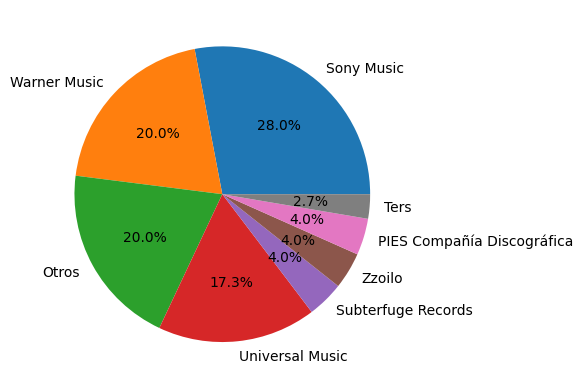

In [80]:
df_pop_con_ñ ['Label'] = df_pop_con_ñ ['Label'].replace({'Sony Music Entertainment': 'Sony Music', 'Sony Music Latin': 'Sony Music'})
df_pop_con_ñ['Label'] = df_pop_con_ñ ['Label'].replace({'WM Spain' : 'Warner Music', 'WM Mexico': 'Warner Music', 'WEA Latina' : 'Warner Music'})
df_pop_con_ñ ['Label'] = df_pop_con_ñ ['Label'].replace({'UMLE - Latino' : 'Universal Music', 'Universal Music Spain S.L.' : 'Universal Music', 'Virgin Music Spain': 'Universal Music'})

frecuencias = df_pop_con_ñ ['Label'].value_counts()
valores_unicos = frecuencias[frecuencias == 1].index
df_pop_con_ñ.loc[df_pop_con_ñ['Label'].isin(valores_unicos), 'Label'] = 'Otros'

porcentajes = df_pop_con_ñ['Label'].value_counts(normalize=True) * 100
valores = porcentajes.values
etiquetas = porcentajes.index
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.show()

In [15]:

# Obtiene los datos de la lista de reproducción
playlist_id = '37i9dQZF1DX1HCSfq0nSal'
results = sp.playlist(playlist_id)

# Procesa los datos
tracks = results['tracks']['items']
playlist_data = []
for track in tracks:
    album = track['track']['album']
    track_data = {
        'Track Name': track['track']['name'],
        'Artist': track['track']['artists'][0]['name'],
        'Album': album['name'],
        'Release Date': album['release_date'],
        'Label': ''
    }

# Obtener información adicional del sello discográfico
    album_details = sp.album(album['id'])
    if 'label' in album_details:
        track_data['Label'] = album_details['label']
    playlist_data.append(track_data)

# Crea un DataFrame
df = pd.DataFrame(playlist_data)

# Exporta el DataFrame a un archivo CSV
df.to_csv('pegao.csv', index=False)


In [16]:
df_pegao = pd.read_csv('pegao.csv')

df_pegao.head(10)

,Track Name,Artist,Album,Release Date,Label
0,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
1,Pacto (feat. Luar La L),Jay Wheeler,Pacto (feat. Luar La L),2023-04-24,Linked Music / Dynamic Records / EMPIRE
2,69,Nicky Jam,69,2023-05-19,Sony Music Latin
3,Corazón Roto - Remix,Brray,Corazón Roto (Remix),2023-04-07,UMLE - Latino
4,Arena y Sal,Omar Montes,Arena y Sal,2023-05-18,Sony Music Latin
5,Mami Chula,Jhayco,Mami Chula,2023-04-28,N&E Entertainment LLC
6,QUE RICO (w/ Bad Gyal),Un Titico,QUE RICO (w/ Bad Gyal),2023-05-18,"2023 Calientalo Media / WK Records / Bad Gyal,..."
7,Supernova,Saiko,Supernova,2023-04-19,2023 SAIKO
8,Que te vaya bien,Rvfv,Que te vaya bien,2023-04-21,NASTU MUSIC
9,Andando,Morad,Reinsertado,2023-05-12,M.D.L.R


In [56]:
df_sorted_pegao = df_pegao.sort_values('Label')

df_sorted_pegao 

,Track Name,Artist,Album,Release Date,Label
11,Tú No Lo Amas,Anuel AA,Real Hasta la Muerte,2018-07-17,"2018 Real Hasta La Muerte, Inc."
41,Piensan,Myke Towers,Easy Money Baby,2020-01-24,2020 One World Music & Casablanca Records | Po...
45,Polaris,Saiko,1371 KM,2022-08-26,2022 Saiko
6,QUE RICO (w/ Bad Gyal),Un Titico,QUE RICO (w/ Bad Gyal),2023-05-18,"2023 Calientalo Media / WK Records / Bad Gyal,..."
43,Sikora,Saiko,Sikora,2023-02-10,2023 SAIKO
7,Supernova,Saiko,Supernova,2023-04-19,2023 SAIKO
34,Las Bratz (Remix),Aissa,Las Bratz (Remix),2023-03-08,Aissa el Aslani Erra
28,M.A - Remix,BM,M.A (Remix),2023-04-05,DALE PLAY Records / Wesaisons Records
14,Amanece,Anuel AA,Amanece,2018-12-14,House of Haze
24,Sígueme - Remix,Feid,Sígueme (Remix),2019-02-01,JP Entertainment (Jorge Pino)


In [65]:
# Vamos a cambiar los nombres regionales de los sellos para poder agruparlos (por ejemplo: WM Spain, WM Mexico y WEA Latina = Warner Music)

df_sorted_pegao ['Label'] = df_sorted_pegao ['Label'].replace({'Sony Music Entertainment': 'Sony Music'})
df_sorted_pegao ['Label'] = df_sorted_pegao ['Label'].replace({'WM Spain' : 'Warner Music', 'WM Mexico': 'Warner Music', 'WEA Latina' : 'Warner Music'})
df_sorted_pegao ['Label'] = df_sorted_pegao ['Label'].replace({'UMLE - Latino' : 'Universal Music', 'Universal Music Spain S.L.' : 'Universal Music'})



In [75]:
# Para que la representación gráfica del dataframe quede más limpia, 
# vamos a sustituir todos los valores que no están repetidos (todos ellos ellos y distribuidoras independientes) por el valor 'Otros'

frecuencias = df_sorted_pegao ['Label'].value_counts()

valores_unicos = frecuencias[frecuencias == 1].index

df_sorted_pegao.loc[df_sorted_pegao['Label'].isin(valores_unicos), 'Label'] = 'Otros'

df_sorted_pegao

,Track Name,Artist,Album,Release Date,Label
11,Tú No Lo Amas,Anuel AA,Real Hasta la Muerte,2018-07-17,Otros
41,Piensan,Myke Towers,Easy Money Baby,2020-01-24,Otros
45,Polaris,Saiko,1371 KM,2022-08-26,Otros
6,QUE RICO (w/ Bad Gyal),Un Titico,QUE RICO (w/ Bad Gyal),2023-05-18,Otros
43,Sikora,Saiko,Sikora,2023-02-10,2023 SAIKO
7,Supernova,Saiko,Supernova,2023-04-19,2023 SAIKO
34,Las Bratz (Remix),Aissa,Las Bratz (Remix),2023-03-08,Otros
28,M.A - Remix,BM,M.A (Remix),2023-04-05,Otros
14,Amanece,Anuel AA,Amanece,2018-12-14,Otros
24,Sígueme - Remix,Feid,Sígueme (Remix),2019-02-01,Otros


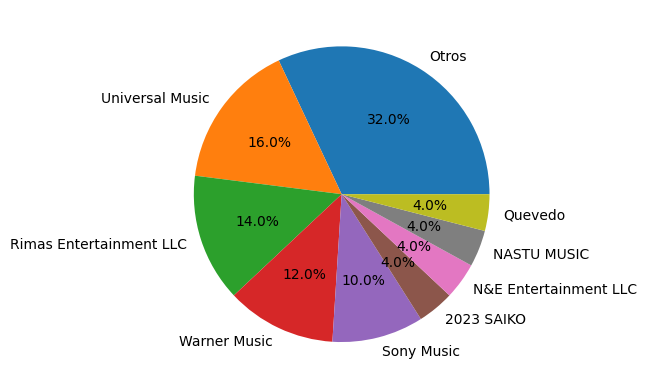

In [76]:
porcentajes = df_sorted_pegao['Label'].value_counts(normalize=True) * 100

valores = porcentajes.values
etiquetas = porcentajes.index

plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.show()

Continuamos visualizando las principales playlist editoriales internacionales: La Lista Pop, Today's Top Hits, RapCaviar (playlist temática con más seguidores: 15M).

In [17]:
# Obtiene los datos de la lista de reproducción
playlist_id = '37i9dQZF1DWSpF87bP6JSF'
results = sp.playlist(playlist_id)

# Procesa los datos
tracks = results['tracks']['items']
playlist_data = []
for track in tracks:
    album = track['track']['album']
    track_data = {
        'Track Name': track['track']['name'],
        'Artist': track['track']['artists'][0]['name'],
        'Album': album['name'],
        'Release Date': album['release_date'],
        'Label': ''
    }

# Obtener información adicional del sello discográfico
    album_details = sp.album(album['id'])
    if 'label' in album_details:
        track_data['Label'] = album_details['label']
    playlist_data.append(track_data)

# Crea un DataFrame
df = pd.DataFrame(playlist_data)

# Exporta el DataFrame a un archivo CSV
df.to_csv('la_lista_pop.csv', index=False)

In [19]:
df_la_lista_pop = pd.read_csv('la_lista_pop.csv')

df_la_lista_pop.head(10)

,Track Name,Artist,Album,Release Date,Label
0,un x100to,Grupo Frontera,un x100to,2023-04-17,Rimas Entertainment LLC.
1,El Merengue,Marshmello,El Merengue,2023-03-03,Sony Music Latin
2,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin
3,BESO,ROSALÍA,RR,2023-03-24,Columbia Records/Duars Entertainment/Sony Musi...
4,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
5,MIENTRAS ME CURO DEL CORA,KAROL G,MAÑANA SERÁ BONITO,2023-02-24,UMLE - Latino
6,VAGABUNDO,Sebastian Yatra,VAGABUNDO,2023-05-12,UMLE - Latino
7,69,Nicky Jam,69,2023-05-19,Sony Music Latin
8,1Trago,Danna Paola,1Trago,2023-04-14,Universal Music Mexico
9,Arranca (feat. Omega),Becky G,Arranca (feat. Omega),2023-03-10,Kemosabe Records/RCA Records


In [20]:
# Obtiene los datos de la lista de reproducción
playlist_id = '37i9dQZF1DXcBWIGoYBM5M'
results = sp.playlist(playlist_id)

# Procesa los datos
tracks = results['tracks']['items']
playlist_data = []
for track in tracks:
    album = track['track']['album']
    track_data = {
        'Track Name': track['track']['name'],
        'Artist': track['track']['artists'][0]['name'],
        'Album': album['name'],
        'Release Date': album['release_date'],
        'Label': ''
    }

# Obtener información adicional del sello discográfico
    album_details = sp.album(album['id'])
    if 'label' in album_details:
        track_data['Label'] = album_details['label']
    playlist_data.append(track_data)

# Crea un DataFrame
df = pd.DataFrame(playlist_data)

# Exporta el DataFrame a un archivo CSV
df.to_csv('todays_top_hits.csv', index=False)

In [21]:
df_todays_top_hits = pd.read_csv('todays_top_hits.csv')

df_todays_top_hits.head(10)

,Track Name,Artist,Album,Release Date,Label
0,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC
1,Kill Bill,SZA,SOS,2022-12-08,Top Dawg Entertainment/RCA Records
2,Calm Down (with Selena Gomez),Rema,Calm Down (with Selena Gomez),2022-08-25,Mavin Records / Jonzing World
3,Flowers,Miley Cyrus,Flowers,2023-01-13,Columbia
4,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),Beyoncé,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),2023-05-19,Parkwood Entertainment/Columbia
5,Boy's a Liar Pt. 2,PinkPantheress,Boy's a liar Pt. 2,2023-02-03,Warner Records
6,Cupid - Twin Ver.,FIFTY FIFTY,The Beginning: Cupid,2023-02-24,WM Korea
7,Die For You - Remix,The Weeknd,Die For You (Remix),2023-02-24,XO / Republic Records
8,As It Was,Harry Styles,As It Was,2022-03-31,Columbia
9,Daylight,David Kushner,Daylight,2023-04-14,"Miserable Music Group, LLC"


In [51]:
inter_esp_exitos = list(set(df_esp['Track Name'].tolist()) & set(df_exitos_esp['Track Name'].tolist()))

df_inter_esp_exitos = pd.DataFrame(inter_esp_exitos, columns=['Track Name'])

df_inter_esp_exitos

# De los 49 temas que hay en la playlist Éxitos España, 40 de ellos están en el top 200 de ventas. 

,Track Name
0,Rara Vez
1,Estrecho / Alvarado (feat. pablopablo)
2,T'as peur
3,Clavaito
4,Los Ángeles
5,REMIX EXCLUSIVO
6,Si La Calle Llama - Remix
7,un x100to
8,El Merengue
9,Nochentera


In [55]:
diferencia = df_exitos_esp.merge(df_esp, how='left', indicator=True)
diferencia = diferencia[diferencia['_merge'] == 'left_only']

diferencia

,Track Name,Artist,Album,Release Date,Label,rank,artist_names,peak_rank,previous_rank,weeks_on_chart,streams,_merge
0,WHERE SHE GOES,Bad Bunny,WHERE SHE GOES,2023-05-18,Rimas Entertainment LLC,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,Acróstico,Shakira,Acróstico,2023-05-11,Sony Music Latin,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,Arena y Sal,Omar Montes,Arena y Sal,2023-05-18,Sony Music Latin,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8,VAGABUNDO,Sebastian Yatra,VAGABUNDO,2023-05-12,UMLE - Latino,NaN,NaN,NaN,NaN,NaN,NaN,left_only
14,Tattoo,Loreen,Tattoo,2023-02-25,Universal Music AB,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,Andando,Morad,Reinsertado,2023-05-12,M.D.L.R,NaN,NaN,NaN,NaN,NaN,NaN,left_only
25,69,Nicky Jam,69,2023-05-19,Sony Music Latin,NaN,NaN,NaN,NaN,NaN,NaN,left_only
27,No Estuviste En Lo Malo,Morad,Reinsertado,2023-05-12,M.D.L.R,NaN,NaN,NaN,NaN,NaN,NaN,left_only
29,DISPARA ***,Nicki Nicole,DISPARA ***,2023-05-17,Sony Music Latin/DALE PLAY Records,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [53]:
df_exitos_esp.info

<bound method DataFrame.info of                                 Track Name            Artist   
0                           WHERE SHE GOES         Bad Bunny  \
1                                 Clavaito            Chanel   
2                                Supernova             Saiko   
3                                Acróstico           Shakira   
4                                 EL TONTO       Lola Indigo   
5                              Arena y Sal       Omar Montes   
6                             Todo Contigo    Álvaro De Luna   
7                               Nochentera             Vicco   
8                                VAGABUNDO   Sebastian Yatra   
9                         Que te vaya bien              Rvfv   
10                         La Bebe - Remix         Yng Lvcas   
11               Si La Calle Llama - Remix    Eladio Carrion   
12                             Niña Bonita              Feid   
13                               T'as peur      Aya Nakamura   
14      

In [34]:
# Obtiene los datos de la lista de reproducción
playlist_id = '37i9dQZF1DX0XUsuxWHRQd'
results = sp.playlist(playlist_id)

# Procesa los datos
tracks = results['tracks']['items']
playlist_data = []
for track in tracks:
    album = track['track']['album']
    track_data = {
        'Track Name': track['track']['name'],
        'Artist': track['track']['artists'][0]['name'],
        'Album': album['name'],
        'Release Date': album['release_date'],
        'Label': ''
    }

# Obtener información adicional del sello discográfico
    album_details = sp.album(album['id'])
    if 'label' in album_details:
        track_data['Label'] = album_details['label']
    playlist_data.append(track_data)

# Crea un DataFrame
df = pd.DataFrame(playlist_data)

# Exporta el DataFrame a un archivo CSV
df.to_csv('rap_caviar.csv', index=False)

In [35]:
df_rap_caviar = pd.read_csv('rap_caviar.csv')

df_rap_caviar

,Track Name,Artist,Album,Release Date,Label
0,War Bout It (feat. 21 Savage),Lil Durk,Almost Healed,2023-05-26,Alamo
1,Ocean Spray,Moneybagg Yo,Ocean Spray,2023-05-24,CMG/N-Less/Interscope Records
2,Search & Rescue,Drake,Search & Rescue,2023-04-07,OVO/Republic Records
3,All My Life (feat. J. Cole),Lil Durk,All My Life (feat. J. Cole),2023-05-12,Alamo
4,Go Hard,Lil Baby,Go Hard,2023-05-03,Quality Control Music/Motown Records
5,Trance (with Travis Scott & Young Thug),Metro Boomin,HEROES & VILLAINS,2022-12-02,Republic Records
6,Gunsmoke Town,Kodak Black,Pistolz & Pearlz,2023-05-26,Atlantic Records
7,"Pissy (feat. Roddy Ricch, Nardo Wick)",Gucci Mane,"Pissy (feat. Roddy Ricch, Nardo Wick)",2023-05-05,1017/Atlantic
8,Private Landing (feat. Justin Bieber & Future),Don Toliver,Love Sick,2023-02-24,Cactus Jack / Atlantic
9,Peaches & Eggplants (feat. 21 Savage),Young Nudy,Peaches & Eggplants (feat. 21 Savage),2023-02-27,PDE Records/Same Plate/RCA Records


In [ ]:
# Siguiente dataset...
# df_2.head()